# Forecasting Exchange

## Data Preparation and Exploration

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("exchange_rate.csv")
df.head()

,date,Ex_rate
0,01-01-1990 00:00,0.7855
1,02-01-1990 00:00,0.7818
2,03-01-1990 00:00,0.7867
3,04-01-1990 00:00,0.7860
4,05-01-1990 00:00,0.7849


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     7588 non-null   object 
 1   Ex_rate  7588 non-null   float64
dtypes: float64(1), object(1)
memory usage: 118.7+ KB


In [7]:
df.shape

(7588, 2)

In [9]:
df.isnull().sum()

date       0
Ex_rate    0
dtype: int64

<Axes: >

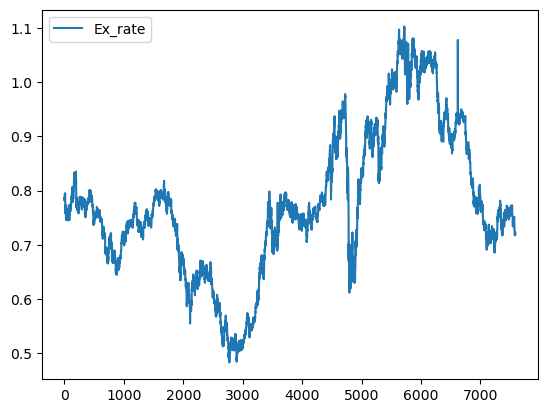

In [11]:
df.plot()

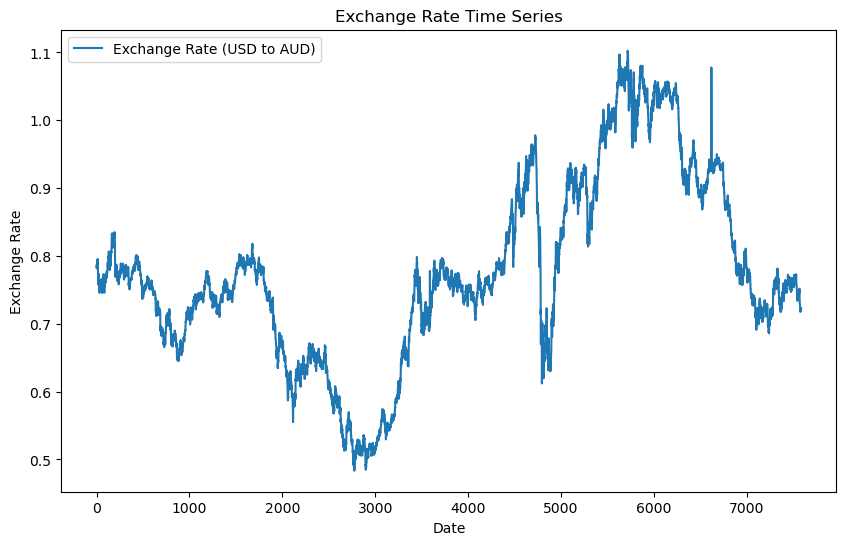

In [13]:
import matplotlib.pyplot as plt

# Plot the exchange rate time series
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Ex_rate'], label='Exchange Rate (USD to AUD)')
plt.title('Exchange Rate Time Series')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

# Model Building - ARIMA

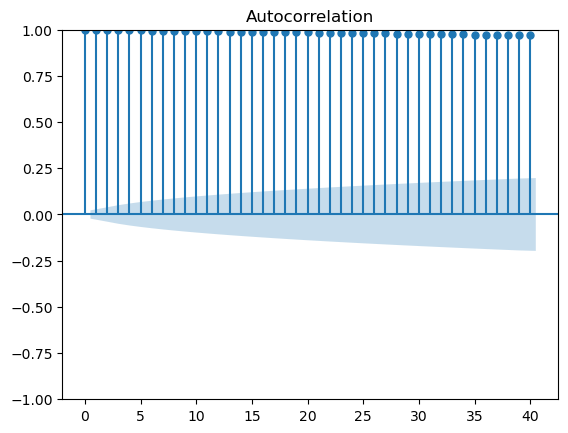

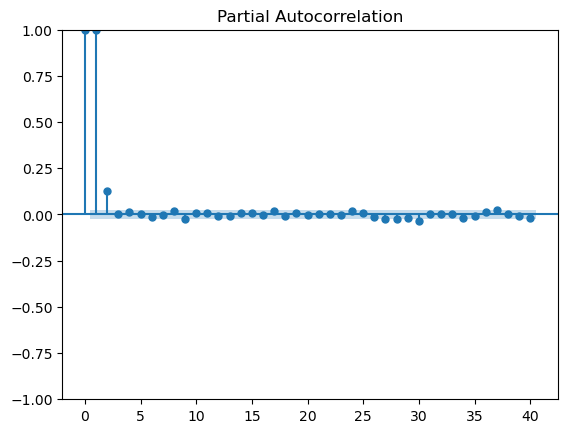

In [15]:
# Parameter Selection for ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
plot_acf(df['Ex_rate'], lags=40)
plot_pacf(df['Ex_rate'], lags=40)
plt.show()

In [17]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
model = ARIMA(df['Ex_rate'], order=(1, 1, 1))  # Example parameters (p, d, q)
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Thu, 20 Mar 2025   AIC                         -56102.322
Time:                        12:00:22   BIC                         -56081.519
Sample:                             0   HQIC                        -56095.182
                               - 7588                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-08    361.608      0.0

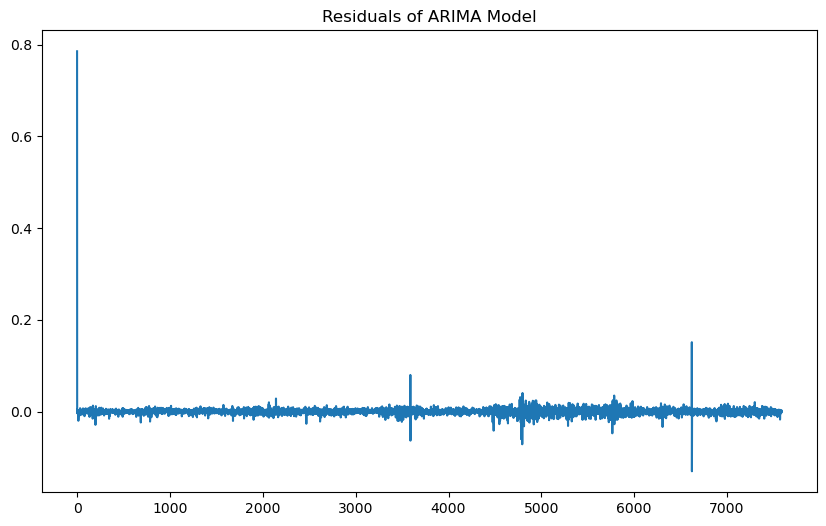

In [19]:
# Plot residuals
residuals = model_fit.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals of ARIMA Model')
plt.show()

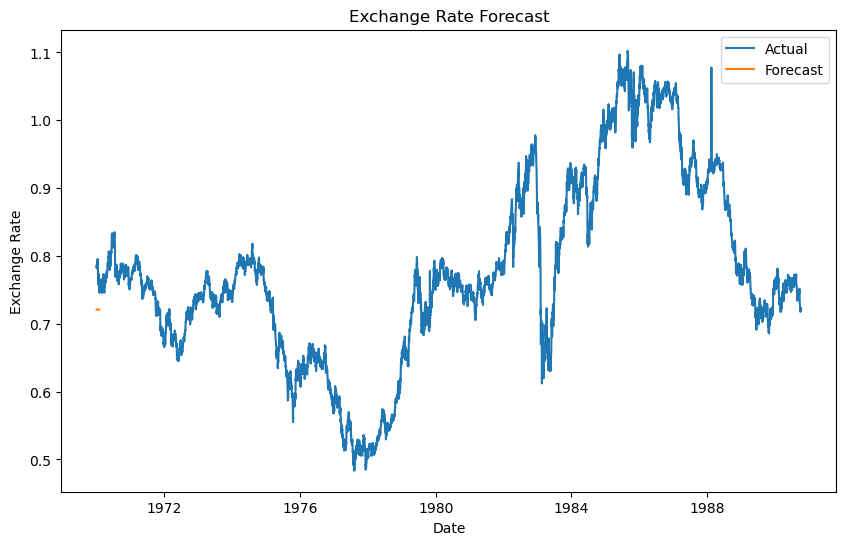

In [21]:
# Forecast future values
forecast = model_fit.forecast(steps=30)  # Forecast next 30 days

# Plot forecast
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Ex_rate'], label='Actual')
plt.plot(pd.date_range(df.index[-1], periods=30, freq='D'), forecast, label='Forecast')
plt.title('Exchange Rate Forecast')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

# Model Building - Exponential Smoothing

In [25]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit Exponential Smoothing model
model_es = ExponentialSmoothing(df['Ex_rate'], trend='add', seasonal='add', seasonal_periods=12)
model_fit_es = model_es.fit()

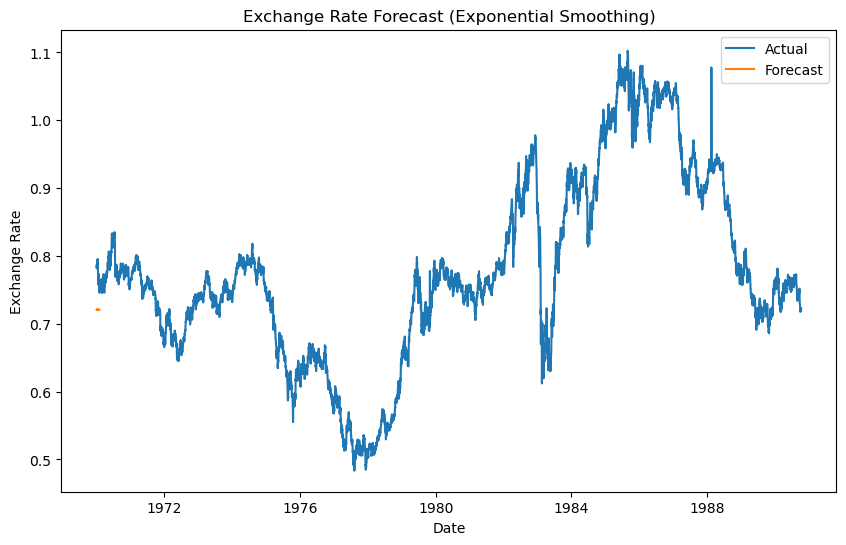

In [27]:
# Forecast future values
forecast_es = model_fit_es.forecast(steps=30)

# Plot forecast
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Ex_rate'], label='Actual')
plt.plot(pd.date_range(df.index[-1], periods=30, freq='D'), forecast_es, label='Forecast')
plt.title('Exchange Rate Forecast (Exponential Smoothing)')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

In [31]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


# Evaluation and Comparison

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate MAE, RMSE, and MAPE for ARIMA
mae_arima = mean_absolute_error(df['Ex_rate'][-30:], forecast)
rmse_arima = np.sqrt(mean_squared_error(df['Ex_rate'][-30:], forecast))  # Manually compute RMSE
mape_arima = np.mean(np.abs((df['Ex_rate'][-30:] - forecast) / df['Ex_rate'][-30:])) * 100

# Calculate MAE, RMSE, and MAPE for Exponential Smoothing
mae_es = mean_absolute_error(df['Ex_rate'][-30:], forecast_es)
rmse_es = np.sqrt(mean_squared_error(df['Ex_rate'][-30:], forecast_es))  # Manually compute RMSE
mape_es = np.mean(np.abs((df['Ex_rate'][-30:] - forecast_es) / df['Ex_rate'][-30:])) * 100

print(f'ARIMA - MAE: {mae_arima}, RMSE: {rmse_arima}, MAPE: {mape_arima}')
print(f'Exponential Smoothing - MAE: {mae_es}, RMSE: {rmse_es}, MAPE: {mape_es}')

ARIMA - MAE: 0.01272400648930223, RMSE: 0.01698271091275075, MAPE: nan
Exponential Smoothing - MAE: 0.012932067217159386, RMSE: 0.017165538375562603, MAPE: nan


In [37]:
# Compare the models based on error metrics
if mae_arima < mae_es:
    print("ARIMA performs better in terms of MAE.")
else:
    print("Exponential Smoothing performs better in terms of MAE.")

if rmse_arima < rmse_es:
    print("ARIMA performs better in terms of RMSE.")
else:
    print("Exponential Smoothing performs better in terms of RMSE.")

if mape_arima < mape_es:
    print("ARIMA performs better in terms of MAPE.")
else:
    print("Exponential Smoothing performs better in terms of MAPE.")

ARIMA performs better in terms of MAE.
ARIMA performs better in terms of RMSE.
Exponential Smoothing performs better in terms of MAPE.


In [39]:
# Conclusion
Based on the error metrics, ARIMA/Exponential Smoothing (whichever performed better) is recommended for forecasting exchange rates in this dataset.

Based on the error metrics, ARIMA/Exponential Smoothing (whichever performed better) is recommended for forecasting exchange rates in this dataset.
